In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

import warnings
warnings.simplefilter('ignore', FutureWarning)

## Data Pre-Processing

In [2]:
#Testing for CVD, using max reduced csv file
heart_cvd = pd.read_csv('max_reduce.csv')
#SEX, AGE, CIGPDAY, HEARTRTE, SYSBP, BPMEDS, TOTCHOL, BMI, GLUCOSE, DIABETES, EDUC_2.0, EDUC_3.0, EDUC_4.0
# Clean to columns needed
heart_cvd = heart_cvd[['SEX','AGE','CIGPDAY','HEARTRTE','SYSBP','BPMEDS','TOTCHOL','BMI','GLUCOSE','DIABETES','EDUC','CVD']]
heart_cvd.head()

,SEX,AGE,CIGPDAY,HEARTRTE,SYSBP,BPMEDS,TOTCHOL,BMI,GLUCOSE,DIABETES,EDUC,CVD
0,1,39,0.0,80.0,106.0,0.0,195.0,26.97,77.0,0,4.0,1
1,2,46,0.0,95.0,121.0,0.0,250.0,28.73,76.0,0,2.0,0
2,2,52,0.0,80.0,105.0,0.0,260.0,29.43,86.0,0,2.0,0
3,2,58,0.0,80.0,108.0,0.0,237.0,28.50,71.0,0,2.0,0
4,1,48,20.0,75.0,127.5,0.0,245.0,25.34,70.0,0,1.0,0


In [3]:
#Encode SEX column
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
heart_cvd['SEX'] = label_encoder.fit_transform(heart_cvd['SEX'])

In [5]:
#Get dummies for educ col, drop first
heart_cvd = pd.get_dummies(heart_cvd,columns=['EDUC'],drop_first=True)
heart_cvd.head()

,SEX,AGE,CIGPDAY,HEARTRTE,SYSBP,BPMEDS,TOTCHOL,BMI,GLUCOSE,DIABETES,CVD,EDUC_2.0,EDUC_3.0,EDUC_4.0
0,0,39,0.0,80.0,106.0,0.0,195.0,26.97,77.0,0,1,0,0,1
1,1,46,0.0,95.0,121.0,0.0,250.0,28.73,76.0,0,0,1,0,0
2,1,52,0.0,80.0,105.0,0.0,260.0,29.43,86.0,0,0,1,0,0
3,1,58,0.0,80.0,108.0,0.0,237.0,28.50,71.0,0,0,1,0,0
4,0,48,20.0,75.0,127.5,0.0,245.0,25.34,70.0,0,0,0,0,0


In [6]:
X = heart_cvd.drop("CVD", axis=1)
y = heart_cvd["CVD"]
print(X.shape, y.shape)

(9310, 13) (9310,)


In [7]:
X.head()

,SEX,AGE,CIGPDAY,HEARTRTE,SYSBP,BPMEDS,TOTCHOL,BMI,GLUCOSE,DIABETES,EDUC_2.0,EDUC_3.0,EDUC_4.0
0,0,39,0.0,80.0,106.0,0.0,195.0,26.97,77.0,0,0,0,1
1,1,46,0.0,95.0,121.0,0.0,250.0,28.73,76.0,0,1,0,0
2,1,52,0.0,80.0,105.0,0.0,260.0,29.43,86.0,0,1,0,0
3,1,58,0.0,80.0,108.0,0.0,237.0,28.50,71.0,0,1,0,0
4,0,48,20.0,75.0,127.5,0.0,245.0,25.34,70.0,0,0,0,0


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=1, stratify=y)
X_scaler = StandardScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Create a Deep Learning Model

In [9]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(units=7, activation='relu', input_dim=13))
model.add(Dense(units=3, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

Using TensorFlow backend.


In [10]:
#https://stackoverflow.com/questions/42081257/keras-binary-crossentropy-vs-categorical-crossentropy-performance
from keras.metrics import categorical_accuracy
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
history = model.fit(
    X_train_scaled,
    y_train,
    epochs=1000,
    shuffle=True,
    verbose=2
)

Epoch 1/1000
 - 0s - loss: 0.6757 - acc: 0.6832
Epoch 2/1000
 - 0s - loss: 0.6344 - acc: 0.7478
Epoch 3/1000
 - 0s - loss: 0.6087 - acc: 0.7481
Epoch 4/1000
 - 0s - loss: 0.5910 - acc: 0.7481
Epoch 5/1000
 - 0s - loss: 0.5780 - acc: 0.7481
Epoch 6/1000
 - 0s - loss: 0.5648 - acc: 0.7505
Epoch 7/1000
 - 0s - loss: 0.5531 - acc: 0.7539
Epoch 8/1000
 - 0s - loss: 0.5426 - acc: 0.7535
Epoch 9/1000
 - 0s - loss: 0.5344 - acc: 0.7558
Epoch 10/1000
 - 0s - loss: 0.5276 - acc: 0.7544
Epoch 11/1000
 - 0s - loss: 0.5222 - acc: 0.7567
Epoch 12/1000
 - 0s - loss: 0.5180 - acc: 0.7562
Epoch 13/1000
 - 0s - loss: 0.5147 - acc: 0.7557
Epoch 14/1000
 - 0s - loss: 0.5119 - acc: 0.7542
Epoch 15/1000
 - 0s - loss: 0.5095 - acc: 0.7557
Epoch 16/1000
 - 0s - loss: 0.5075 - acc: 0.7555
Epoch 17/1000
 - 0s - loss: 0.5061 - acc: 0.7547
Epoch 18/1000
 - 0s - loss: 0.5046 - acc: 0.7558
Epoch 19/1000
 - 0s - loss: 0.5038 - acc: 0.7531
Epoch 20/1000
 - 0s - loss: 0.5027 - acc: 0.7567
Epoch 21/1000
 - 0s - loss: 0

 - 0s - loss: 0.4813 - acc: 0.7655
Epoch 168/1000
 - 0s - loss: 0.4811 - acc: 0.7665
Epoch 169/1000
 - 0s - loss: 0.4812 - acc: 0.7643
Epoch 170/1000
 - 0s - loss: 0.4812 - acc: 0.7658
Epoch 171/1000
 - 0s - loss: 0.4811 - acc: 0.7661
Epoch 172/1000
 - 0s - loss: 0.4811 - acc: 0.7661
Epoch 173/1000
 - 0s - loss: 0.4811 - acc: 0.7668
Epoch 174/1000
 - 0s - loss: 0.4812 - acc: 0.7657
Epoch 175/1000
 - 0s - loss: 0.4812 - acc: 0.7654
Epoch 176/1000
 - 0s - loss: 0.4811 - acc: 0.7657
Epoch 177/1000
 - 0s - loss: 0.4811 - acc: 0.7645
Epoch 178/1000
 - 0s - loss: 0.4810 - acc: 0.7661
Epoch 179/1000
 - 0s - loss: 0.4812 - acc: 0.7650
Epoch 180/1000
 - 0s - loss: 0.4812 - acc: 0.7665
Epoch 181/1000
 - 0s - loss: 0.4811 - acc: 0.7650
Epoch 182/1000
 - 0s - loss: 0.4812 - acc: 0.7635
Epoch 183/1000
 - 0s - loss: 0.4811 - acc: 0.7645
Epoch 184/1000
 - 0s - loss: 0.4808 - acc: 0.7644
Epoch 185/1000
 - 0s - loss: 0.4809 - acc: 0.7660
Epoch 186/1000
 - 0s - loss: 0.4808 - acc: 0.7658
Epoch 187/1000


 - 0s - loss: 0.4782 - acc: 0.7680
Epoch 332/1000
 - 0s - loss: 0.4780 - acc: 0.7667
Epoch 333/1000
 - 0s - loss: 0.4778 - acc: 0.7691
Epoch 334/1000
 - 0s - loss: 0.4782 - acc: 0.7647
Epoch 335/1000
 - 0s - loss: 0.4779 - acc: 0.7643
Epoch 336/1000
 - 0s - loss: 0.4780 - acc: 0.7661
Epoch 337/1000
 - 0s - loss: 0.4780 - acc: 0.7675
Epoch 338/1000
 - 0s - loss: 0.4781 - acc: 0.7658
Epoch 339/1000
 - 0s - loss: 0.4778 - acc: 0.7667
Epoch 340/1000
 - 0s - loss: 0.4781 - acc: 0.7677
Epoch 341/1000
 - 0s - loss: 0.4778 - acc: 0.7670
Epoch 342/1000
 - 0s - loss: 0.4778 - acc: 0.7678
Epoch 343/1000
 - 0s - loss: 0.4778 - acc: 0.7673
Epoch 344/1000
 - 0s - loss: 0.4781 - acc: 0.7651
Epoch 345/1000
 - 0s - loss: 0.4780 - acc: 0.7661
Epoch 346/1000
 - 0s - loss: 0.4782 - acc: 0.7664
Epoch 347/1000
 - 0s - loss: 0.4778 - acc: 0.7673
Epoch 348/1000
 - 0s - loss: 0.4779 - acc: 0.7684
Epoch 349/1000
 - 0s - loss: 0.4780 - acc: 0.7663
Epoch 350/1000
 - 0s - loss: 0.4777 - acc: 0.7645
Epoch 351/1000


 - 0s - loss: 0.4765 - acc: 0.7678
Epoch 496/1000
 - 0s - loss: 0.4764 - acc: 0.7674
Epoch 497/1000
 - 0s - loss: 0.4767 - acc: 0.7671
Epoch 498/1000
 - 0s - loss: 0.4765 - acc: 0.7638
Epoch 499/1000
 - 0s - loss: 0.4769 - acc: 0.7674
Epoch 500/1000
 - 0s - loss: 0.4767 - acc: 0.7645
Epoch 501/1000
 - 0s - loss: 0.4764 - acc: 0.7668
Epoch 502/1000
 - 0s - loss: 0.4764 - acc: 0.7684
Epoch 503/1000
 - 0s - loss: 0.4770 - acc: 0.7657
Epoch 504/1000
 - 0s - loss: 0.4764 - acc: 0.7654
Epoch 505/1000
 - 0s - loss: 0.4764 - acc: 0.7665
Epoch 506/1000
 - 0s - loss: 0.4766 - acc: 0.7660
Epoch 507/1000
 - 0s - loss: 0.4765 - acc: 0.7654
Epoch 508/1000
 - 0s - loss: 0.4765 - acc: 0.7660
Epoch 509/1000
 - 0s - loss: 0.4766 - acc: 0.7657
Epoch 510/1000
 - 0s - loss: 0.4765 - acc: 0.7663
Epoch 511/1000
 - 0s - loss: 0.4764 - acc: 0.7677
Epoch 512/1000
 - 0s - loss: 0.4765 - acc: 0.7667
Epoch 513/1000
 - 0s - loss: 0.4766 - acc: 0.7668
Epoch 514/1000
 - 0s - loss: 0.4765 - acc: 0.7661
Epoch 515/1000


 - 0s - loss: 0.4760 - acc: 0.7684
Epoch 660/1000
 - 0s - loss: 0.4764 - acc: 0.7674
Epoch 661/1000
 - 0s - loss: 0.4762 - acc: 0.7691
Epoch 662/1000
 - 0s - loss: 0.4760 - acc: 0.7675
Epoch 663/1000
 - 0s - loss: 0.4762 - acc: 0.7665
Epoch 664/1000
 - 0s - loss: 0.4763 - acc: 0.7675
Epoch 665/1000
 - 0s - loss: 0.4763 - acc: 0.7678
Epoch 666/1000
 - 0s - loss: 0.4763 - acc: 0.7677
Epoch 667/1000
 - 0s - loss: 0.4761 - acc: 0.7690
Epoch 668/1000
 - 0s - loss: 0.4761 - acc: 0.7687
Epoch 669/1000
 - 0s - loss: 0.4763 - acc: 0.7675
Epoch 670/1000
 - 0s - loss: 0.4763 - acc: 0.7658
Epoch 671/1000
 - 0s - loss: 0.4763 - acc: 0.7674
Epoch 672/1000
 - 0s - loss: 0.4761 - acc: 0.7673
Epoch 673/1000
 - 0s - loss: 0.4762 - acc: 0.7696
Epoch 674/1000
 - 0s - loss: 0.4762 - acc: 0.7673
Epoch 675/1000
 - 0s - loss: 0.4763 - acc: 0.7671
Epoch 676/1000
 - 0s - loss: 0.4762 - acc: 0.7673
Epoch 677/1000
 - 0s - loss: 0.4761 - acc: 0.7675
Epoch 678/1000
 - 0s - loss: 0.4762 - acc: 0.7661
Epoch 679/1000


 - 0s - loss: 0.4758 - acc: 0.7680
Epoch 824/1000
 - 0s - loss: 0.4758 - acc: 0.7677
Epoch 825/1000
 - 0s - loss: 0.4758 - acc: 0.7677
Epoch 826/1000
 - 0s - loss: 0.4761 - acc: 0.7675
Epoch 827/1000
 - 0s - loss: 0.4759 - acc: 0.7671
Epoch 828/1000
 - 0s - loss: 0.4760 - acc: 0.7684
Epoch 829/1000
 - 0s - loss: 0.4757 - acc: 0.7696
Epoch 830/1000
 - 0s - loss: 0.4758 - acc: 0.7664
Epoch 831/1000
 - 0s - loss: 0.4760 - acc: 0.7687
Epoch 832/1000
 - 0s - loss: 0.4761 - acc: 0.7694
Epoch 833/1000
 - 0s - loss: 0.4759 - acc: 0.7688
Epoch 834/1000
 - 0s - loss: 0.4760 - acc: 0.7681
Epoch 835/1000
 - 0s - loss: 0.4760 - acc: 0.7681
Epoch 836/1000
 - 0s - loss: 0.4758 - acc: 0.7704
Epoch 837/1000
 - 0s - loss: 0.4760 - acc: 0.7680
Epoch 838/1000
 - 0s - loss: 0.4759 - acc: 0.7696
Epoch 839/1000
 - 0s - loss: 0.4761 - acc: 0.7681
Epoch 840/1000
 - 0s - loss: 0.4758 - acc: 0.7696
Epoch 841/1000
 - 0s - loss: 0.4758 - acc: 0.7708
Epoch 842/1000
 - 0s - loss: 0.4760 - acc: 0.7667
Epoch 843/1000


 - 0s - loss: 0.4758 - acc: 0.7691
Epoch 988/1000
 - 0s - loss: 0.4757 - acc: 0.7677
Epoch 989/1000
 - 0s - loss: 0.4758 - acc: 0.7670
Epoch 990/1000
 - 0s - loss: 0.4758 - acc: 0.7691
Epoch 991/1000
 - 0s - loss: 0.4757 - acc: 0.7703
Epoch 992/1000
 - 0s - loss: 0.4758 - acc: 0.7688
Epoch 993/1000
 - 0s - loss: 0.4756 - acc: 0.7688
Epoch 994/1000
 - 0s - loss: 0.4756 - acc: 0.7670
Epoch 995/1000
 - 0s - loss: 0.4758 - acc: 0.7693
Epoch 996/1000
 - 0s - loss: 0.4757 - acc: 0.7697
Epoch 997/1000
 - 0s - loss: 0.4758 - acc: 0.7690
Epoch 998/1000
 - 0s - loss: 0.4757 - acc: 0.7703
Epoch 999/1000
 - 0s - loss: 0.4757 - acc: 0.7690
Epoch 1000/1000
 - 0s - loss: 0.4758 - acc: 0.7697


## Quantify our Trained Model

In [11]:
model_loss, model_accuracy = model.evaluate(
    X_test_scaled, y_test, verbose=2)
print(
    f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

Normal Neural Network - Loss: 0.519602697227419, Accuracy: 0.7551546393800846


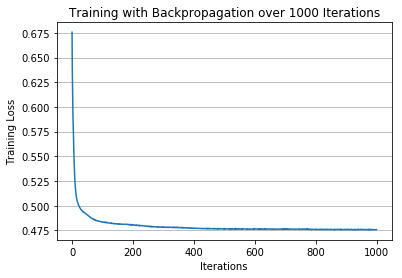

In [12]:
# loss is sum of error on training set
# error should decrease over epochs, steeper the better
plt.plot(history.history['loss'])
plt.title('Training with Backpropagation over 1000 Iterations')
plt.ylabel('Training Loss')
plt.xlabel('Iterations')
plt.grid(axis='y')

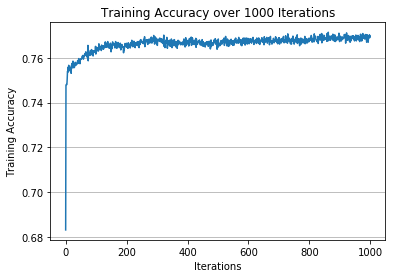

In [13]:
# accuracy should increase over epochs
plt.plot(history.history['acc'])
plt.title('Training Accuracy over 1000 Iterations')
plt.ylabel('Training Accuracy')
plt.xlabel('Iterations')
plt.grid(axis='y')

In [14]:
def pred_count(heart_cvd):
    corr = 0
    wron = 0
    for index, row in heart_cvd.iterrows():
        if row['predicted'] == row['actual']:
            corr = corr + 1
        else:
            wron = wron + 1

    print(f'Correct predictions: {corr}')
    print(f'Incorrect predictions: {wron}')

predictions = model.predict_classes(X_test_scaled)
test_df = pd.DataFrame({'predicted':np.ravel(predictions),'actual':np.ravel(y_test)})
pred_count(test_df)


Correct predictions: 1758
Incorrect predictions: 570


# Saving a Trained Model
We can save our trained models using the HDF5 binary format with the extension `.h5`

In [15]:
# Save the model
model.save("framingham_cvd.h5")

# Loading a Model

In [16]:
import pandas as pd
# Load the model
from keras.models import load_model
cvd_model = load_model("framingham_cvd.h5")

## Evaluating the loaded model

In [17]:
model_loss, model_accuracy = cvd_model.evaluate(
    X_test_scaled, y_test, verbose=2)
print(
    f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

Normal Neural Network - Loss: 0.519602697227419, Accuracy: 0.7551546393800846


In [18]:
#%% create a sample "good" patient, not from data
#SEX, AGE, CIGPDAY, HEARTRTE, SYSBP, BPMEDS, TOTCHOL, BMI, GLUCOSE, DIABETES, EDUC_2.0, EDUC_3.0, EDUC_4.0
pt = {'SEX':[0],'AGE':[20],'CIGPDAY':[0],'HEARTRTE':[65],'SYSBP':[120],
     'BPMEDS':[0],'TOTCHOL':[130],'BMI':[23],'GLUCOSE':[70],'DIABETES':[0],
     'educ_2.0':[0],'educ_3.0':[0],'educ_4.0':[1]}
good_patient = pd.DataFrame(pt)

# return probability of response (cvd)
cvd_model.predict_proba(good_patient)

array([[1.]], dtype=float32)

In [19]:
print(f"Predicted class: {cvd_model.predict_classes(good_patient)}")

Predicted class: [[1]]


In [20]:
#%% create a sample "bad" patient, not from data
pt = {'SEX':[1],'AGE':[75],'CIGPDAY':[5],'HEARTRTE':[68],'SYSBP':[180],
     'BPMEDS':[0],'TOTCHOL':[210],'BMI':[25],'GLUCOSE':[70],'DIABETES':[0],
     'educ_2.0':[0],'educ_3.0':[0],'educ_4.0':[0]}
bad_patient = pd.DataFrame(pt)

# return probability of response (cvd)
cvd_model.predict_proba(bad_patient)

array([[1.]], dtype=float32)

In [21]:
print(f"Predicted class: {cvd_model.predict_classes(bad_patient)}")

Predicted class: [[1]]


In [27]:
#%% create a sample "bad" patient, not from data
pt2 = {'SEX':[1],'AGE':[75],'CIGPDAY':[5],'HEARTRTE':[68],'SYSBP':[180],
     'BPMEDS':[0],'TOTCHOL':[210],'BMI':[25],'GLUCOSE':[70],'DIABETES':[0],
     'educ_2.0':[0],'educ_3.0':[0],'educ_4.0':[0]}
bad_patient2 = pd.DataFrame(pt2)

# return probability of response (cvd)
cvd_model.predict(bad_patient2)

array([[1.]], dtype=float32)

In [23]:
print(f"Predicted class: {cvd_model.predict_classes(bad_patient2)}")

Predicted class: [[1]]
